In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
results = pd.read_csv('tune_random_forest_regression_all_continuous.csv')
results.shape

(960, 5)

In [3]:
results.columns


Index(['name', 'feature', 'depth', 'trees', 'rmse'], dtype='object')

In [4]:

print("names {}".format(list(results['name'].value_counts().to_dict().keys())))
print("features {}".format(list(results['feature'].value_counts().to_dict().keys())))
print("depth {}".format(list(results['depth'].value_counts().to_dict().keys())))
print("trees {}".format(list(results['trees'].value_counts().to_dict().keys())))

names ['Chagas', 'MalariaNovartis', 'LogP', 'Xanthine-Bostaurus', 'MalariaGSK', 'ADMECaco2', 'TB_SRI', 'MouseRatTox', 'TB_MDR', 'Caco2']
features ['rdkit', 'cdk']
depth [30, 20, 15, 10, 5, 2]
trees [70, 60, 50, 40, 30, 20, 10, 5]


In [5]:

summary = results.loc[results.groupby("name", as_index=False)["rmse"].idxmin()].sort_values('rmse')
summary

,name,feature,depth,trees,rmse
955,MalariaGSK,rdkit,30,50,0.279259
89,Chagas,rdkit,30,40,0.480349
379,MalariaNovartis,rdkit,30,50,0.536647
191,TB_MDR,rdkit,30,70,0.553292
857,Caco2,rdkit,30,40,0.598199
567,Xanthine-Bostaurus,rdkit,30,30,0.616180
477,LogP,rdkit,30,60,0.769740
709,TB_SRI,rdkit,10,20,2.088798
614,ADMECaco2,cdk,10,30,39.370937
201,MouseRatTox,rdkit,2,40,1082.649562


In [6]:
summary = summary.loc[~summary['name'].isin(['ADMECaco2', 'Caco2', 'MouseRatTox', 'TB_SRI'])]
summary

,name,feature,depth,trees,rmse
955,MalariaGSK,rdkit,30,50,0.279259
89,Chagas,rdkit,30,40,0.480349
379,MalariaNovartis,rdkit,30,50,0.536647
191,TB_MDR,rdkit,30,70,0.553292
567,Xanthine-Bostaurus,rdkit,30,30,0.616180
477,LogP,rdkit,30,60,0.769740


In [7]:
results = results.loc[~results['name'].isin(['ADMECaco2', 'Caco2', 'MouseRatTox', 'TB_SRI'])]
results.shape

(576, 5)

In [8]:
df = results[(results['depth'] == 30) & (results['feature'] == 'rdkit')]
df.shape

(48, 5)

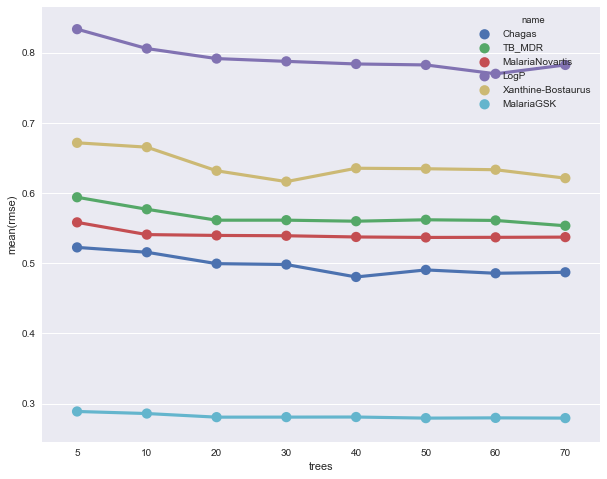

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
sns.pointplot(x='trees', y='rmse', hue='name', data=df, ax=axes)

In [10]:
df = results[(results['depth'] == 30) & (results['trees'] == 40)]
df.shape

(12, 5)

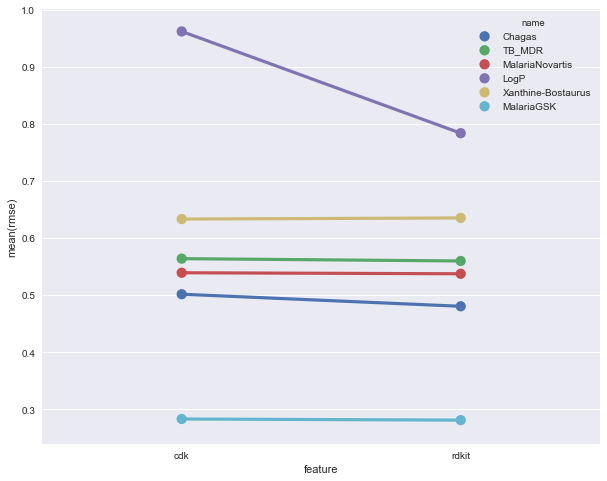

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
sns.pointplot(x='feature', y='rmse', hue='name', data=df, ax=axes)

In [12]:
df = results[(results['depth'] == 30)]
df.shape

(96, 5)

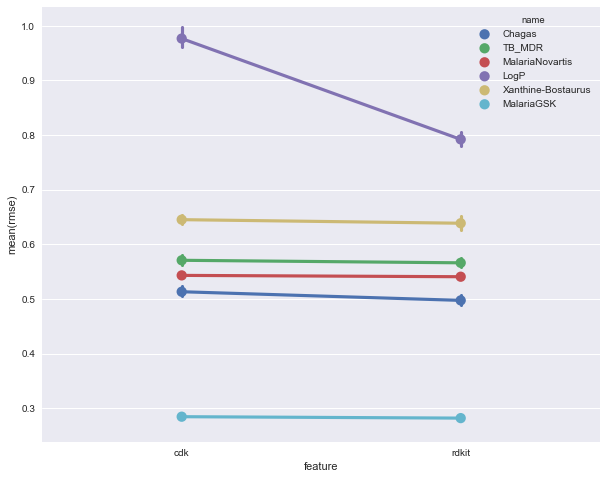

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
sns.pointplot(x='feature', y='rmse', hue='name', data=df, ax=axes)

In [14]:
label_df = pd.read_csv('MouseRatToxLabels.csv')
label_df.shape

(773, 4)

In [15]:
td_rat = label_df['activity_value'].dropna()
len(td_rat)

379

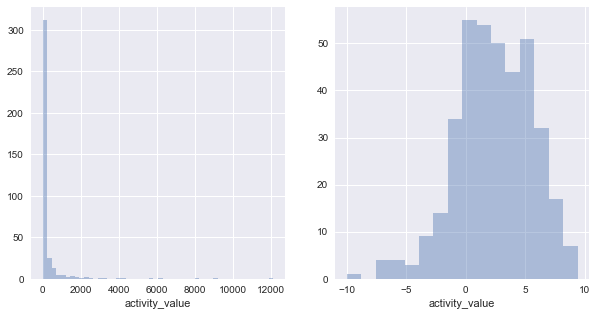

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.distplot(td_rat, kde=False, ax=axes[0])
sns.distplot(np.log(td_rat), kde=False, ax=axes[1])

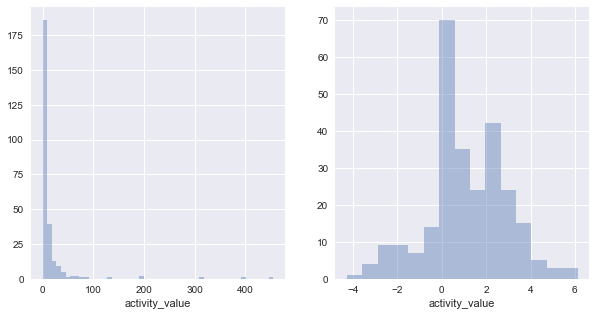

In [17]:
admecaco2_efflux = pd.read_csv('ADMECaco2Labels.csv')['activity_value'].dropna()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.distplot(admecaco2_efflux, kde=False, ax=axes[0])
sns.distplot(np.log(admecaco2_efflux), kde=False, ax=axes[1])

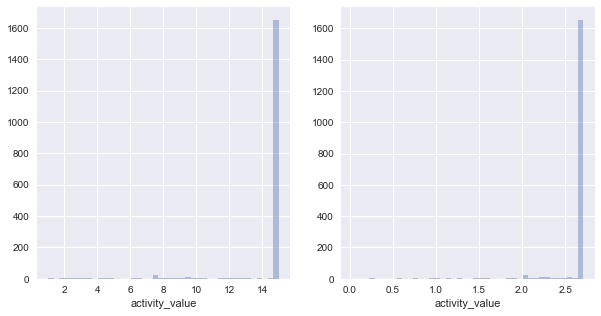

In [18]:
tb_cc50 = pd.read_csv('TB_SRI_Labels.csv')['activity_value'].dropna()
#tb_cc50 = tb_cc50[tb_cc50 > 14]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.distplot(tb_cc50, kde=False, ax=axes[0])
sns.distplot(np.log(tb_cc50), kde=False, ax=axes[1])

In [19]:
test = pd.read_csv('TB_SRI_Labels.csv')
test['activity_value'].value_counts()

15.000    1651
7.500       17
2.625        2
9.667        2
2.189        1
9.409        1
6.341        1
4.807        1
4.231        1
1.869        1
10.519       1
9.175        1
12.732       1
4.636        1
12.017       1
2.443        1
7.860        1
2.142        1
3.537        1
14.577       1
4.496        1
5.157        1
3.109        1
1.313        1
12.871       1
1.490        1
1.787        1
13.694       1
8.477        1
5.833        1
          ... 
14.638       1
2.798        1
7.567        1
4.528        1
9.866        1
12.989       1
11.916       1
8.696        1
12.934       1
1.200        1
4.760        1
9.401        1
12.476       1
12.311       1
9.814        1
9.019        1
4.412        1
12.653       1
1.305        1
6.360        1
3.143        1
4.544        1
14.567       1
6.853        1
3.685        1
13.046       1
8.875        1
9.986        1
9.583        1
9.615        1
Name: activity_value, Length: 115, dtype: int64

In [20]:
(tb_cc50 == 15).value_counts()


True     1651
False     132
Name: activity_value, dtype: int64